# WeRateDogs: Wrangling and Analyzing Data

## Data Gathering
In the cells below, **all** three pieces of data for this project are loaded into the notebook. 

In [1]:
import pandas as pd
import json
import requests
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


1. WeRateDogs Twitter archive data (twitter-archive-enhanced.csv)

In [2]:
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Tweet image prediction (image_predictions.tsv)

In [3]:
image = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content
image_predictions = pd.read_csv(io.StringIO(image.decode('utf-8')), sep='\s+')

3. Json file of tweets from API (tweet_json.txt) loaded into dataframe

In [4]:
dog_ratings = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        dog_ratings.append(data)
tweet_count = pd.DataFrame(dog_ratings, columns=['id', 'retweet_count', 'favorite_count'])

## Assessing Data

## Visual Assessment 

In [5]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
617,680206703334408192,https://pbs.twimg.com/media/CXCUYcRW8AAObYM.jpg,1,Christmas_stocking,0.149758,False,cloak,0.128830,False,teddy,0.109129,False
56,667065535570550784,https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg,1,jigsaw_puzzle,0.560001,False,doormat,0.103259,False,space_heater,0.042568,False
1265,749317047558017024,https://pbs.twimg.com/ext_tw_video_thumb/74931...,1,wire-haired_fox_terrier,0.155144,True,Lakeland_terrier,0.108382,True,buckeye,0.074617,False
65,667174963120574464,https://pbs.twimg.com/media/CUJIFoJWsAAL3Dc.jpg,1,toy_poodle,0.266437,True,Chihuahua,0.243223,True,bluetick,0.072806,True
1950,863079547188785154,https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg,1,Lakeland_terrier,0.275242,True,Airedale,0.190569,True,teddy,0.102595,False
1168,735991953473572864,https://pbs.twimg.com/media/CjbExRKUoAAs089.jpg,2,cocker_spaniel,0.961643,True,toy_poodle,0.011547,True,soft-coated_wheaten_terrier,0.004903,True
901,700002074055016451,https://pbs.twimg.com/media/CbboKP4WIAAw8xq.jpg,1,Chihuahua,0.369488,True,schipperke,0.243367,True,pug,0.161614,True
696,684481074559381504,https://pbs.twimg.com/media/CX_D6AJWwAAnBIw.jpg,1,Chihuahua,0.937810,True,Pomeranian,0.020307,True,polecat,0.017357,False
1155,733109485275860992,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False
790,690649993829576704,https://pbs.twimg.com/media/CZWugJsWYAIzVzJ.jpg,1,bighorn,0.215438,False,hyena,0.137928,False,Mexican_hairless,0.098171,True


In [6]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [7]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
tweet_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
220,850019790995546112,NaN,NaN,2017-04-06 16:18:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Boomer. He's a sandy pupper. Havi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850019790...,12,10,Boomer,None,None,pupper,None
424,821522889702862852,NaN,NaN,2017-01-18 01:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harlso. He has a really good idea but ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821522889...,13,10,Harlso,None,None,None,None
2207,668627278264475648,NaN,NaN,2015-11-23 03:09:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timofy. He's a pilot for Southwest. It...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668627278...,9,10,Timofy,None,None,None,None
128,867774946302451713,NaN,NaN,2017-05-25 16:10:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Harold. He's h*ckin cooperative. 13/10 g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867774946...,13,10,Harold,None,None,None,None
421,821886076407029760,NaN,NaN,2017-01-19 01:04:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimison. He was just called a good boy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821886076...,13,10,Jimison,None,None,None,None


In [9]:
tweet_count.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2473.411689,7059.636872
std,6.820795e+16,4189.001030,10970.657824
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,495.000000,1225.000000
50%,7.178418e+17,1149.000000,3052.000000
75%,7.986547e+17,2864.500000,8612.000000
max,8.924206e+17,70821.000000,145003.000000


In [10]:
tweet_count.sample(5)

,id,retweet_count,favorite_count
519,806620845233815552,5150,0
1003,745422732645535745,2208,7959
801,769695466921623552,1564,6053
589,797545162159308800,4625,13897
67,879130579576475649,5748,0


## Programmatic Assessment

In [11]:
tweet_count.info()
tweet_count.dtypes
sum(tweet_count.duplicated())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


0

In [12]:
image_predictions.dtypes
image_predictions.info()
sum(image_predictions.duplicated())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


0

In [13]:
tweet_archive.info()
tweet_archive.dtypes
sum(tweet_archive.duplicated())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

0

### Quality issues
1.Some rows are not about dogs. 

2.Some rows are not original tweets

3.Some rows are replies to tweets

4.Some rows do not have a predictable image of a dog

5.Some cells have no data.

6.Column titles are not consistent

7.Some columns do not add to the analysis

8.Some dogs do not have correct name

### Tidiness issues
1.Only one dataset required for the analysis

2.Time and date in same column

## Cleaning Data


In [14]:
df_archive = tweet_archive.copy()
df_images = image_predictions.copy()
df_counts = tweet_count.copy()

### Issue #1: 

id column in df_counts should be tweet_id for uniformity.

#### Define:
Column to be remaned to tweet_id

#### Code

In [15]:
df_counts.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [16]:
df_counts.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7018,33839
1,892177421306343426,5303,29354
2,891815181378084864,3486,22073
3,891689557279858688,7231,36969
4,891327558926688256,7770,35344


### Issue #2:
In the df_archive dataframe, some IDs are retweets. These are found in the retweeted_status_id column.          

#### Define

These can be dropped by referencing the index of rows where they are found. Tweet ids are integers and can be filtered by equality.

#### Code

In [17]:
df_archive.drop(df_archive.index[df_archive['retweeted_status_user_id'] >= 1], inplace=True)

#### Test

In [18]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

# Issue #3: 
Some tweet ids are replies to tweet in the df_archive dataframe.

#### Define
These can be dropped by referencing the index of rows where they are found.

# Code

In [19]:
df_archive.drop(df_archive.index[df_archive['in_reply_to_user_id'] >= 1], inplace=True)

# Test

In [20]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

# Issue #4:
Some tweets are not about dogs in the df_archive dataframe.  

# Define
The name column has strings such as a, an, such, life. However dog names begin with uppercase and can be filtered.

# Code

In [21]:
df_archive = df_archive[df_archive['name'].str[0].str.isupper()]

# Test

In [22]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
423,821765923262631936,NaN,NaN,2017-01-18 17:07:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duchess. She uses dark doggo forces to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821765923...,13,10,Duchess,doggo,None,None,None
86,875747767867523072,NaN,NaN,2017-06-16 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Goose. He's a womanizer. Cheeky as h*c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875747767...,13,10,Goose,None,None,None,None
685,788150585577050112,NaN,NaN,2016-10-17 22:51:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a golden chow. Rather h*ckin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788150585...,13,10,Leo,None,None,None,None
640,793241302385262592,NaN,NaN,2016-11-01 00:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's out here bustin h*ckin gh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793241302...,13,10,Tucker,None,None,None,None
708,785264754247995392,NaN,NaN,2016-10-09 23:44:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He requested to be carried around...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785264754...,12,10,Doc,None,None,None,None


# Issue #5:
Some tweets do not have a predictable image of a dog.

# Define
The neural network made 3 predictions of the images in df_images. If all are false, the image is likely not of a dog.

# Code

In [23]:
df_images = df_images.query("p1_dog or p2_dog or p3_dog")

# Test

In [24]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


# Issue #6:
Some columns contain no value. 

# Define
After dropping some rows the corresponding columns are dropped in the df_archive dataframe.

# Code

In [25]:
df_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'retweeted_status_id'], axis=1, inplace=True)

# Test

In [26]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1993 non-null   int64 
 1   timestamp           1993 non-null   object
 2   source              1993 non-null   object
 3   text                1993 non-null   object
 4   expanded_urls       1990 non-null   object
 5   rating_numerator    1993 non-null   int64 
 6   rating_denominator  1993 non-null   int64 
 7   name                1993 non-null   object
 8   doggo               1993 non-null   object
 9   floofer             1993 non-null   object
 10  pupper              1993 non-null   object
 11  puppo               1993 non-null   object
dtypes: int64(3), object(9)
memory usage: 202.4+ KB


# Issue #7:
Dog stages from the df_archive dataframe will not be used for this analysis

# Define
The dog stages (puppo, doggo, etc) will be drooped as there are a lot of None values.

# Code

In [27]:
df_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

# Test

In [28]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1993 non-null   int64 
 1   timestamp           1993 non-null   object
 2   source              1993 non-null   object
 3   text                1993 non-null   object
 4   expanded_urls       1990 non-null   object
 5   rating_numerator    1993 non-null   int64 
 6   rating_denominator  1993 non-null   int64 
 7   name                1993 non-null   object
dtypes: int64(3), object(5)
memory usage: 140.1+ KB


# Issue #8:
Dog names with None

# Define
Rows with a dog name of None will be dropped

# Code

In [29]:
df_archive = df_archive.replace(to_replace='None', value=np.nan).dropna()

# Test

In [30]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 2325
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1390 non-null   int64 
 1   timestamp           1390 non-null   object
 2   source              1390 non-null   object
 3   text                1390 non-null   object
 4   expanded_urls       1390 non-null   object
 5   rating_numerator    1390 non-null   int64 
 6   rating_denominator  1390 non-null   int64 
 7   name                1390 non-null   object
dtypes: int64(3), object(5)
memory usage: 97.7+ KB


# Issue #9:
Columns to be dropped from df_images

In [31]:
df_images.drop(['p1_dog', 'p2_dog', 'p3_dog'], axis=1, inplace=True)

In [32]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p2        1751 non-null   object 
 6   p2_conf   1751 non-null   float64
 7   p3        1751 non-null   object 
 8   p3_conf   1751 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 136.8+ KB


# Tidiness issues

# Issue 1
More dataframes than required

# Define
Merge will be done in two stages. df_images with df_counts on tweet_id and the resulting dataframe with df_archives on tweet_id. 

# Code

In [33]:
image_tweet = pd.merge(df_counts, df_images, on='tweet_id')

# Test

In [34]:
image_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1736 entries, 0 to 1735
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1736 non-null   int64  
 1   retweet_count   1736 non-null   int64  
 2   favorite_count  1736 non-null   int64  
 3   jpg_url         1736 non-null   object 
 4   img_num         1736 non-null   int64  
 5   p1              1736 non-null   object 
 6   p1_conf         1736 non-null   float64
 7   p2              1736 non-null   object 
 8   p2_conf         1736 non-null   float64
 9   p3              1736 non-null   object 
 10  p3_conf         1736 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 162.8+ KB


In [35]:
archive_image = pd.merge(df_archive, image_tweet, on='tweet_id')

In [36]:
archive_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179 entries, 0 to 1178
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1179 non-null   int64  
 1   timestamp           1179 non-null   object 
 2   source              1179 non-null   object 
 3   text                1179 non-null   object 
 4   expanded_urls       1179 non-null   object 
 5   rating_numerator    1179 non-null   int64  
 6   rating_denominator  1179 non-null   int64  
 7   name                1179 non-null   object 
 8   retweet_count       1179 non-null   int64  
 9   favorite_count      1179 non-null   int64  
 10  jpg_url             1179 non-null   object 
 11  img_num             1179 non-null   int64  
 12  p1                  1179 non-null   object 
 13  p1_conf             1179 non-null   float64
 14  p2                  1179 non-null   object 
 15  p2_conf             1179 non-null   float64
 16  p3    

# Issue 2
Timestamp column to be separated into date and time as datetime

# Define
The timestamp column will be separated to fulfill requirement for tidiness

# Code 

In [37]:
archive_image['timestamp'] = pd.to_datetime(archive_image['timestamp'])
archive_image['date'] = [d.date() for d in archive_image['timestamp']]
archive_image['time'] = [d.time() for d in archive_image['timestamp']]
archive_image['date'] = pd.to_datetime(archive_image['date'])

# Test

In [38]:
archive_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179 entries, 0 to 1178
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1179 non-null   int64              
 1   timestamp           1179 non-null   datetime64[ns, UTC]
 2   source              1179 non-null   object             
 3   text                1179 non-null   object             
 4   expanded_urls       1179 non-null   object             
 5   rating_numerator    1179 non-null   int64              
 6   rating_denominator  1179 non-null   int64              
 7   name                1179 non-null   object             
 8   retweet_count       1179 non-null   int64              
 9   favorite_count      1179 non-null   int64              
 10  jpg_url             1179 non-null   object             
 11  img_num             1179 non-null   int64              
 12  p1                  1179 non-null 

# Issue 3
Some Columns will be renamed and dropped 

# Define
To further tidy the dataframe, columns names will be renamed and some columns dropped.

In [39]:
archive_image.drop(['timestamp', 'source', 'expanded_urls'], axis=1, inplace=True)

In [40]:
archive_image.rename(columns={'img_num':'image_number', 'p1_conf':'p1_confidence', 'p3_conf':'p3_confidence', 'p2_conf':'p2_confidence'}, inplace=True)

In [41]:
archive_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179 entries, 0 to 1178
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1179 non-null   int64         
 1   text                1179 non-null   object        
 2   rating_numerator    1179 non-null   int64         
 3   rating_denominator  1179 non-null   int64         
 4   name                1179 non-null   object        
 5   retweet_count       1179 non-null   int64         
 6   favorite_count      1179 non-null   int64         
 7   jpg_url             1179 non-null   object        
 8   image_number        1179 non-null   int64         
 9   p1                  1179 non-null   object        
 10  p1_confidence       1179 non-null   float64       
 11  p2                  1179 non-null   object        
 12  p2_confidence       1179 non-null   float64       
 13  p3                  1179 non-null   object      

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [42]:
archive_image.to_csv('twitter_archive_master.csv', index=False)

In [43]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [44]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1179 non-null   int64  
 1   text                1179 non-null   object 
 2   rating_numerator    1179 non-null   int64  
 3   rating_denominator  1179 non-null   int64  
 4   name                1179 non-null   object 
 5   retweet_count       1179 non-null   int64  
 6   favorite_count      1179 non-null   int64  
 7   jpg_url             1179 non-null   object 
 8   image_number        1179 non-null   int64  
 9   p1                  1179 non-null   object 
 10  p1_confidence       1179 non-null   float64
 11  p2                  1179 non-null   object 
 12  p2_confidence       1179 non-null   float64
 13  p3                  1179 non-null   object 
 14  p3_confidence       1179 non-null   float64
 15  date                1179 non-null   object 
 16  time  

## Analyzing and Visualizing Data


In [45]:
df_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,image_number,p1_confidence,p2_confidence,p3_confidence
count,1.179000e+03,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,7.471334e+17,10.995759,10.032231,2248.140797,8269.582697,1.215437,0.608892,0.135130,0.061518
std,6.882728e+16,2.824670,1.168625,3405.148314,10669.878997,0.582191,0.271066,0.100874,0.052806
min,6.664188e+17,2.000000,7.000000,19.000000,90.000000,1.000000,0.044333,0.000014,0.000003
25%,6.813009e+17,10.000000,10.000000,576.500000,2058.500000,1.000000,0.375205,0.052705,0.015066
50%,7.320056e+17,11.000000,10.000000,1300.000000,4418.000000,1.000000,0.610453,0.120853,0.049237
75%,8.053641e+17,12.000000,10.000000,2698.500000,10693.500000,1.000000,0.872809,0.198359,0.095207
max,8.921774e+17,75.000000,50.000000,51740.000000,111783.000000,4.000000,0.999962,0.467678,0.273419


### Insights:

1. Over 75% of tweets have their image 1 as being the most confident for the breed of dog. This is due to the shear number of tweets with image 1.

2. Over 50% of images have a 1st prediction confidence of over 60%.

3. Less than 50% of original ratings tweets have valid images.

4. Tweets with higher image 4 have a minimum higher confidence in prediction. Image number 4 has the highest minimum confidence for 1st prediction, but drops off for subsequent predictions.

5. There is positive correllation between favourite counts and retweet count.

6. There is a positive correlation between retweet count and ratings.

### Visualizations

<AxesSubplot:title={'center':'Counts Correlation'}, xlabel='retweet_count', ylabel='favorite_count'>

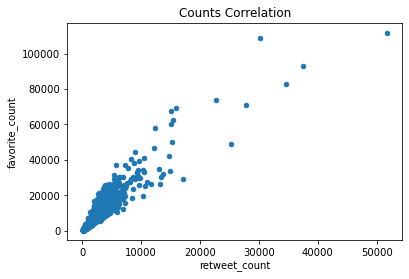

In [46]:
df_master.plot(x='retweet_count', y= 'favorite_count', kind = 'scatter', title = 'Counts Correlation')

The image is a visual of the relationship between the favorite counts and retweet counts of tweet ids. It shows a positive correlation between them indicating that most users interacting with tweets were likely to give both a favorite and a retweet to a particular tweet. 

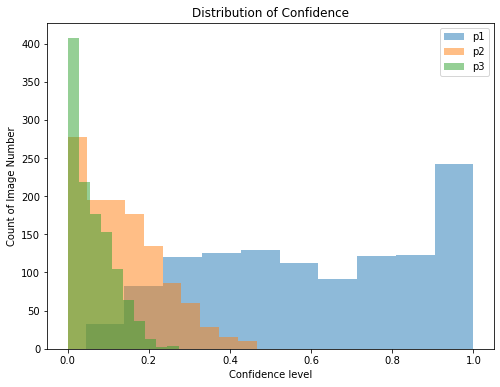

In [47]:
fig, ax = plt.subplots(figsize =(8,6))
ax.hist(df_master['p1_confidence'], alpha=0.5, label='p1')
ax.hist(df_master['p2_confidence'], alpha=0.5, label='p2')
ax.hist(df_master['p3_confidence'], alpha=0.5, label='p3')
ax.set_title('Distribution of Confidence')
ax.set_xlabel('Confidence level')
ax.set_ylabel('Count of Image Number')
ax.legend(loc='upper right')
plt.show()

The neural network made 3 predictions p1, p2 and p3 of what an image was and whether it was true for a dog or not. The visual above shows a distribution of the confidence of each prediction. The first prediction p1 has a much higher confidence level than subsequent predictions p2 and p3.

<AxesSubplot:xlabel='Confidence Level', ylabel='Image Count'>

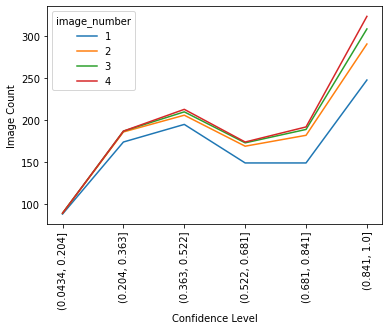

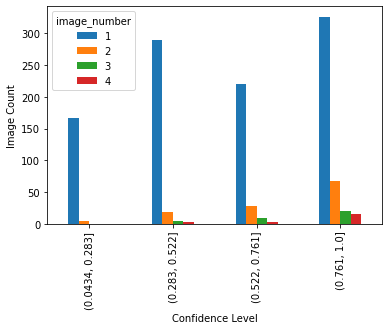

In [48]:
df_master['Bin'] = pd.cut(df_master.p1_confidence, bins=6)
df_master.groupby('Bin')['image_number'].value_counts().unstack().plot(kind='line', stacked=True, xlabel='Confidence Level', ylabel='Image Count')
plt.xticks(rotation=90)
df_master['Bin'] = pd.cut(df_master.p1_confidence, bins=4)
df_master.groupby('Bin')['image_number'].value_counts().unstack().plot.bar(xlabel='Confidence Level', ylabel='Image Count')

The data was cleaned to ensure that an image was associated with each tweet. As a tweet can have up to 4 images, the neural network gave each tweet id an image number 1, 2, 3 and 4 according to its position in a tweet. The p1 confidence level associated with each image number was analyzed to create the visual above. Image number 1 has the largest area of the line chart corresponding to most images being a number 1. However, image number 4 has the highest minimum p1 confidence level.

A detailed report of the project motivation and conclusion been documented along with this analysis.

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Project 2_ WeRateDogs.ipynb'])

1